# Road Accidents in India


## Exploratory Data Analysis on the datasets

### Loading data

In [1]:
#loading drive

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
cd 'drive/My Drive/motorcycle_accidents/'

/content/drive/My Drive/motorcycle_accidents


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

In [7]:
# loading the first dataset

accident_data = pd.read_excel('datafile.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [0]:
accident_data

In [0]:
accident_data.describe()

In [0]:
accident_data.columns.values

### Change in number of accidents through the years

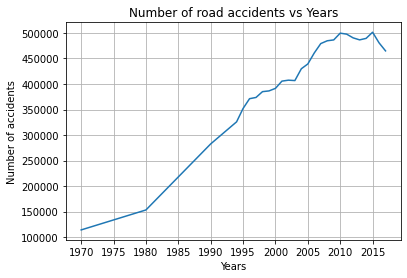

In [22]:
plt.plot(accident_data['Years'], accident_data['Total Number of Road Accidents (in numbers)'])
plt.xlabel('Years')
plt.ylabel('Number of accidents')
plt.title('Number of road accidents vs Years')
plt.grid()
plt.xticks(range(1970, 2018, 5))
plt.show()

**Observation:**
- It is clear that the number of road accidents increase through the years, however we see a sharp drop in the year 2015

### Change in number of accidents as number of motor vehicles increase


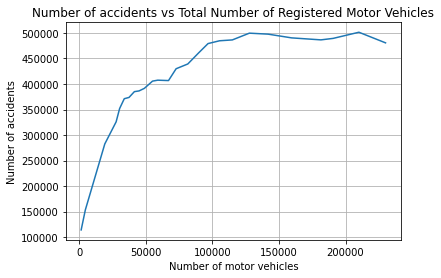

In [29]:
plt.plot(accident_data['Total Number of Registered Motor Vehicles (in thousands)'], accident_data['Total Number of Road Accidents (in numbers)'])
plt.xlabel('Number of motor vehicles')
plt.ylabel('Number of accidents')
plt.title('Number of accidents vs Total Number of Registered Motor Vehicles')
plt.grid()
plt.show()

**Observation:**
- There also appears a steady rise in number of accidents with the increase of number of motor vehicles but at 1 lakh motor vehicles, the number of accidents remains stable

### Fatality rate of accidents

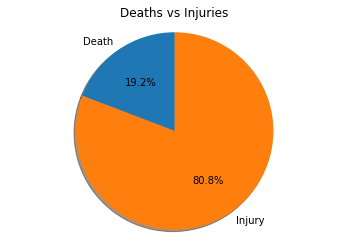

Total deaths   =  2662471
Total injuries =  11200995


In [43]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Death', 'Injury'
sizes = [accident_data['Total Number of Persons Killed (in numbers)'].sum(), accident_data['Total Number of Persons Injured (in numbers)'].sum()]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Deaths vs Injuries')
plt.show()
print('Total deaths   = ', accident_data['Total Number of Persons Killed (in numbers)'].sum())
print('Total injuries = ', accident_data['Total Number of Persons Injured (in numbers)'].sum())

In [0]:
#Loading the second dataset

accident_times = pd.read_csv('only_road_accidents_data3.csv')
accident_months = pd.read_csv('only_road_accidents_data_month2.csv')

### Is there a certain time in the day where most accidents occur?

In [45]:
accident_times.columns.values

array(['STATE/UT', 'YEAR', '0-3 hrs. (Night)', '3-6 hrs. (Night)',
       '6-9 hrs (Day)', '9-12 hrs (Day)', '12-15 hrs (Day)',
       '15-18 hrs (Day)', '18-21 hrs (Night)', '21-24 hrs (Night)',
       'Total'], dtype=object)

In [47]:
accident_times

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206
...,...,...,...,...,...,...,...,...,...,...,...
485,West Bengal,2010,1241,1397,1721,2508,2272,2296,1831,1459,14725
486,West Bengal,2011,1200,1493,1687,2553,2182,2196,1812,1345,14468
487,West Bengal,2012,1346,1511,1837,2831,2328,2268,1966,1521,15608
488,West Bengal,2013,1442,1911,2136,2900,2246,2366,2137,1411,16549


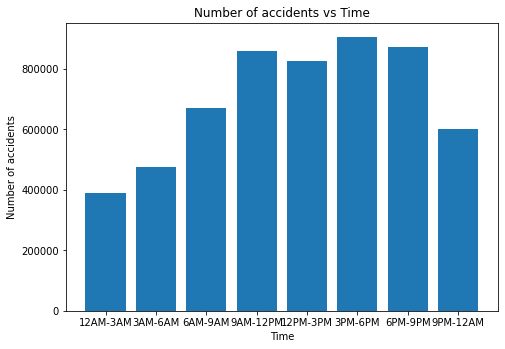

In [159]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Number of accidents vs Time')
plt.xlabel('Time')
plt.ylabel('Number of accidents')
labels = ['12AM-3AM', '3AM-6AM', '6AM-9AM', '9AM-12PM', '12PM-3PM', '3PM-6PM', '6PM-9PM', '9PM-12AM']
times = [accident_times['0-3 hrs. (Night)'].sum(), accident_times['3-6 hrs. (Night)'].sum(), accident_times['6-9 hrs (Day)'].sum(), accident_times['9-12 hrs (Day)'].sum(), accident_times['12-15 hrs (Day)'].sum(), accident_times['15-18 hrs (Day)'].sum(), accident_times['18-21 hrs (Night)'].sum(), accident_times['21-24 hrs (Night)'].sum()]
ax.bar(labels,times)
plt.show()

**Observation:**
- Most accidents occur during peak hour traffic, that is, between 9AM and 9PM

### Accidents statistics based on States

In [0]:
states = accident_times['STATE/UT'].unique()

In [59]:
accident_months.columns.values

array(['STATE/UT', 'YEAR', 'JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY',
       'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER',
       'DECEMBER', 'TOTAL'], dtype=object)

In [108]:
state_year_month_df = accident_months.copy()

state_year_month_df['SUMMER']=state_year_month_df[['JUNE','JULY','AUGUST']].sum(axis=1)
state_year_month_df['AUTUMN']=state_year_month_df[['SEPTEMBER','OCTOBER','NOVEMBER']].sum(axis=1)
state_year_month_df['WINTER']=state_year_month_df[['DECEMBER','JANUARY','FEBRUARY']].sum(axis=1)
state_year_month_df['SPRING']=state_year_month_df[['MARCH','APRIL','MAY']].sum(axis=1)

#Delete month columns..
state_year_month_df=state_year_month_df.drop(['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY'
                                             ,'AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'], axis=1)
#Create groups of states, summing the values of accident number for each year..
state_grouped=state_year_month_df.groupby(['STATE/UT']).sum()
'''
#Create % columns for noting the % of accidents happening in each state for each season..
state_grouped['%_SUMMER']=state_grouped['SUMMER']/state_grouped['TOTAL']
state_grouped['%_AUTUMN']=state_grouped['AUTUMN']/state_grouped['TOTAL']
state_grouped['%_WINTER']=state_grouped['WINTER']/state_grouped['TOTAL']
state_grouped['%_SPRING']=state_grouped['SPRING']/state_grouped['TOTAL']
'''
display(state_grouped.iloc[:,:].head())

,YEAR,TOTAL,SUMMER,AUTUMN,WINTER,SPRING
STATE/UT,,,,,,
A & N Islands,28105,2893,689,710,779,715
Andhra Pradesh,28105,546821,132891,129230,138633,146067
Arunachal Pradesh,28105,3389,748,875,920,846
Assam,28105,61718,14696,15382,15671,15969
Bihar,28105,92648,23506,20866,21994,26282


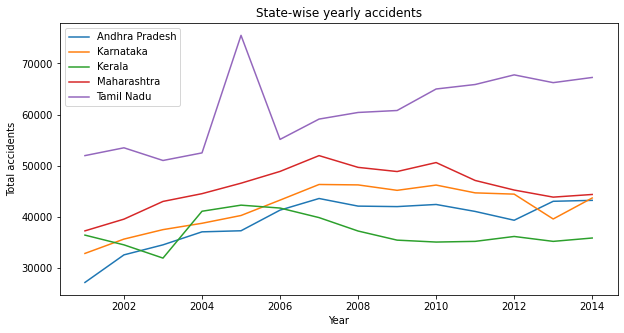

In [110]:
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)
high_states=list(highest_accident_states.head().index)
df4=state_year_month_df.loc[state_year_month_df['STATE/UT'].isin(high_states),['STATE/UT','YEAR','TOTAL']]

plt.figure(figsize=(10,5))
ax=plt.subplot(111)
for key, grp in df4.groupby(['STATE/UT']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', y='TOTAL', label=key)
  
plt.xlabel('Year')
plt.ylabel('Total accidents')
plt.title('State-wise yearly accidents')
plt.show()

**Observation:**
- We can see that Tamil Nadu has had a higher increase in the total accidents but there's an unusual spike during the year 2005

### Cause of accidents

### No safety gear, that is, no helmet or seat belt

In [127]:
safety_equip = pd.read_excel('no_safety.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [138]:
safety_equip.head()

,States/UTs,Drivers - Persons Killed - Yes,Drivers - Persons Killed - No,Drivers - Grievously Injured - Yes,Drivers - Grievously Injured - No,Drivers - Minor Injured - Yes,Drivers - Minor Injured - No,Drivers - Non Injured - Yes,Drivers - Non Injured - No,Passengers - Persons Killed - Yes,Passengers - Persons Killed - No,Passengers - Grievously Injured - Yes,Passengers - Grievously Injured - No,Passengers - Minor Injured - Yes,Passengers - Minor Injured - No,Passengers - Non Injured - Yes,Passengers - Non Injured - No
0,Andhra Pradesh,441,369,916,290,2016,470,561,1567,432,265,810,33,1540,507,460,1877
1,Arunachal Pradesh,2,1,9,4,1,0,0,0,13,2,46,13,37,7,4,0
2,Assam,252,71,208,184,88,61,0,0,356,350,624,760,171,81,0,0
3,Bihar,306,0,284,0,122,0,163,0,564,1276,497,1055,250,400,0,0
4,Chhattisgarh,46,200,50,143,132,385,37,11,14,279,29,183,75,1146,3,1


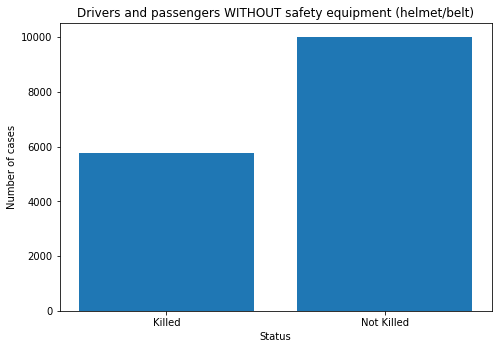

In [163]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
labels = ['Killed', 'Not Killed']
drivers = [safety_equip['Drivers - Persons Killed - Yes'].values[-1], safety_equip['Drivers - Persons Killed - No'].values[-1]]
plt.ylabel('Number of cases')
plt.xlabel('Status')
plt.title('Drivers and passengers WITHOUT safety equipment (helmet/belt)')
ax.bar(labels,drivers)
plt.show()

### Road conditions

In [139]:
road_conditions = pd.read_excel('road_environment.xls', usecols=['Residential Area - Total Accidents', 'Institutional Area - Total Accidents', 'Market/Commercial area - Total Accidents', 'Open Area - Total Accidents', 'Others - Total Accidents'])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


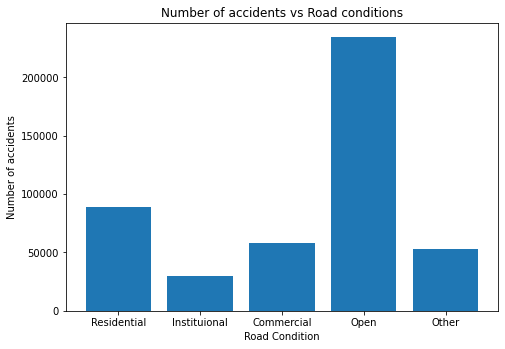

In [161]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
labels = ['Residential', 'Instituional', 'Commercial', 'Open', 'Other']
condition = [road_conditions['Residential Area - Total Accidents'].values[-1], road_conditions['Institutional Area - Total Accidents'].values[-1], road_conditions['Market/Commercial area - Total Accidents'].values[-1], road_conditions['Open Area - Total Accidents'].values[-1], road_conditions['Others - Total Accidents'].values[-1]]
plt.ylabel('Number of accidents')
plt.title('Number of accidents vs Road conditions')
plt.xlabel('Road Condition')
ax.bar(labels,condition)
plt.show()

**Observation:**
- We observe that open roads witness significantly more number of accidents than other places

### Driver's license

In [147]:
license_data = pd.read_excel('license.xls')
license_data = license_data.drop(['Licence not known'], axis=1)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [150]:
license_data.head()

,States/UTs,Valid Permanent License,Learner's Licence,Without Licence
0,Andhra Pradesh,20848,1193,3686
1,Arunachal Pradesh,100,85,56
2,Assam,6204,513,453
3,Bihar,7120,1310,425
4,Chhattisgarh,8918,2360,2285


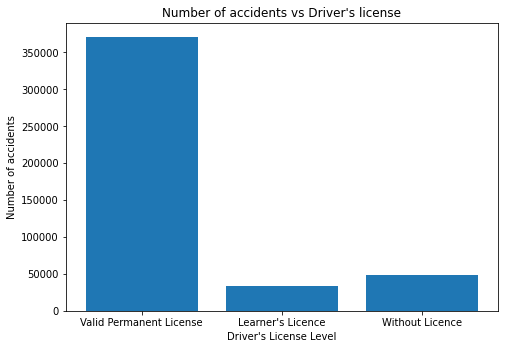

In [164]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
labels = license_data.columns.values[1:]
condition = [license_data['Valid Permanent License'].values[-1], license_data['Learner\'s Licence'].values[-1], license_data['Without Licence'].values[-1]]
plt.ylabel('Number of accidents')
plt.title('Number of accidents vs Driver\'s license')
plt.xlabel('Driver\'s License Level')
ax.bar(labels,condition)
plt.show()

**Observation:**
- Expectedly, most accidents are seen by Valid permanent license holders because of their majority. However, it is interesting to see that there are more drivers who met with an accident without a license than with a learner's license

### Weather conditions

In [153]:
weather_condition = pd.read_excel('climate.xls', usecols=['Sunny/Clear - Total Accidents', 'Rainy - Total Accidents', 'Foggy & Misty - Total Accidents', 'Hail/Sleet - Total Accidents', 'Others - Total Accidents'])

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


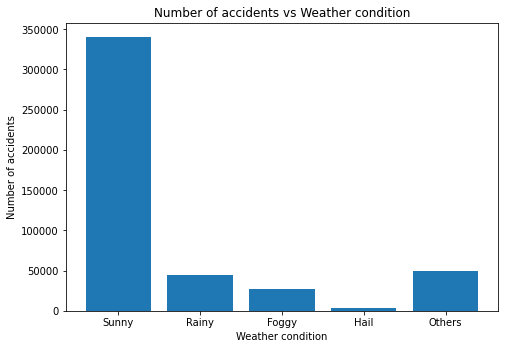

In [162]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
labels = ['Sunny', 'Rainy', 'Foggy', 'Hail', 'Others']
condition = [weather_condition['Sunny/Clear - Total Accidents'].values[-1], weather_condition['Rainy - Total Accidents'].values[-1], weather_condition['Foggy & Misty - Total Accidents'].values[-1], weather_condition['Hail/Sleet - Total Accidents'].values[-1], weather_condition['Others - Total Accidents'].values[-1]]
plt.ylabel('Number of accidents')
plt.title('Number of accidents vs Weather condition')
plt.xlabel('Weather condition')
ax.bar(labels,condition)
plt.show()

## Checking for correlation

In [0]:
countries_details = pd.read_csv('countries of the world.csv')

In [0]:
countries_accidents = pd.read_csv('countries_accidents.csv')

In [233]:
countries_details.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [276]:
for index, country in enumerate(countries_details['Country']):
  countries_details['Country'][index] = country.strip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
countries_combined = pd.merge(countries_details, countries_accidents, on='Country', how='left')


In [311]:
countries_accidents['Country'][0] == countries_details['Country'][0]

True

In [312]:
countries_accidents.head()

,Country,death_rate
0,Afghanistan,15.5
1,Albania,15.1
2,Algeria,23.8
3,Andorra,7.6
4,Angola,26.9


In [0]:
countries_combined = countries_combined[countries_combined['death_rate'].notna()]

In [0]:
countries_combined = countries_combined.sort_values(by='GDP ($ per capita)', ascending=True)

In [315]:
countries_combined

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,death_rate
183,Sierra Leone,SUB-SAHARAN AFRICA,6005250,71740,"83,7","0,56",0,"143,64",500.0,"31,4","4,0","6,98","0,89","92,13",2,"45,76","23,03","0,49","0,31","0,21",27.3
188,Somalia,SUB-SAHARAN AFRICA,8863338,637657,"13,9","0,47","5,37","116,7",500.0,"37,8","11,3","1,67","0,04","98,29",1,"45,13","16,63","0,65","0,1","0,25",25.4
125,Malawi,SUB-SAHARAN AFRICA,13013926,118480,"109,8","0,00",0,"103,32",600.0,"62,7","7,9","23,38","1,49","75,13",2,"43,13","19,33","0,342","0,158","0,499",35.0
33,Burundi,SUB-SAHARAN AFRICA,8090068,27830,"290,7","0,00","-0,06","69,29",600.0,"51,6","3,4","35,05","14,02","50,93",2,"42,22","13,46","0,463","0,203","0,334",31.3
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38",15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,Denmark,WESTERN EUROPE,5450661,43094,"126,5","16,97","2,48","4,56",31100.0,"100,0","614,6","54,02","0,19","45,79",3,"11,13","10,36","0,018","0,246","0,735",3.5
196,Switzerland,WESTERN EUROPE,7523934,41290,"182,2","0,00","4,05","4,39",32700.0,"99,0","680,9","10,42","0,61","88,97",3,"9,71","8,49","0,015","0,34","0,645",3.3
177,San Marino,WESTERN EUROPE,29251,61,"479,5","0,00","10,98","5,73",34600.0,"96,0","704,3","16,67",0,"83,33",NaN,"10,02","8,17",NaN,NaN,NaN,3.2
154,Norway,WESTERN EUROPE,4610820,323802,"14,2","7,77","1,74","3,7",37800.0,"100,0","461,7","2,87",0,"97,13",3,"11,46","9,4","0,021","0,415","0,564",3.8


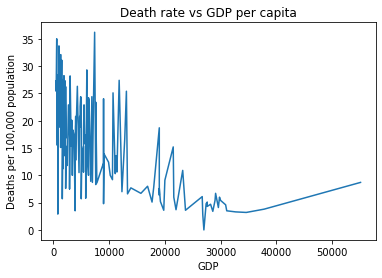

In [286]:
plt.plot(countries_combined['GDP ($ per capita)'], countries_combined['death_rate'])
plt.xlabel('GDP')
plt.ylabel('Deaths per 100,000 population')
plt.title('Death rate vs GDP per capita')
'''
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    '''
plt.show()

In [0]:
countries_combined['Literacy (%)'] = countries_combined['Literacy (%)'].str.replace(',', '.')

In [0]:
countries_combined['Literacy (%)'] = pd.to_numeric(countries_combined['Literacy (%)'])

In [0]:
coeff_matrix = countries_combined.corr(method='pearson')

In [334]:
coeff_matrix.sort_values(by='Literacy (%)')

,Population,Area (sq. mi.),GDP ($ per capita),Literacy (%),death_rate
death_rate,0.022055,0.053209,-0.637629,-0.593997,1.000000
Population,1.000000,0.535121,-0.066221,-0.043834,0.022055
Area (sq. mi.),0.535121,1.000000,0.058297,0.018113,0.053209
GDP ($ per capita),-0.066221,0.058297,1.000000,0.512793,-0.637629
Literacy (%),-0.043834,0.018113,0.512793,1.000000,-0.593997


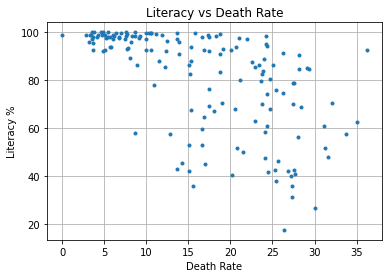

In [348]:
countries_combined.sort_values(by='Literacy (%)', ascending=True)
plt.plot(countries_combined['death_rate'], countries_combined['Literacy (%)'], linestyle='', marker='o', markersize=3)
plt.xlabel('Death Rate')
plt.ylabel('Literacy %')
plt.title('Literacy vs Death Rate')
plt.grid()
plt.show()